In [52]:
import numpy as np
import matplotlib.pyplot as plt


In [53]:
### Initial Laser Measurements 
distances = [00.5,1.131,1.312,2.26,3.26,4.26,5.26,6.26,7.26,8.26] #m
distances = np.array(distances)
del_dist = 0.005 # 0.5 cm uncertainty in distances
beam_diam_cm = [1.5,2.5,3,5,6.5,8.5,11,12.5,14.5,16.5] #cm
beam_diam = np.array(beam_diam_cm) * 10**(-2) #m
del_beam_diam = 0.0005 #0.5 mm uncertainty in beam measurement
'''
NOTE: Beam Diameter was measured on an unstable surface which has difficult to keep level, there is a
greater incalculable uncertainty related to these measurements which could not be avoided since we could
not find a better surface to use.
'''
d_0 = 0.0015 #m

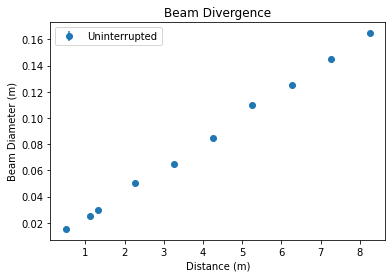

In [54]:
## Plot
plt.errorbar(distances, beam_diam, label="Uninterrupted",yerr = del_beam_diam, fmt = 'o')
plt.xlabel("Distance (m)")
plt.ylabel("Beam Diameter (m)")
plt.title("Beam Divergence")
plt.legend()

Divergence is given by 
$$
d^2(z) = d_0^2+\theta^2z^2
$$
Thus, we solve to find $\theta$ 
$$
\theta  = \sqrt{\frac{d^2-d_0^2}{z^2}}
$$

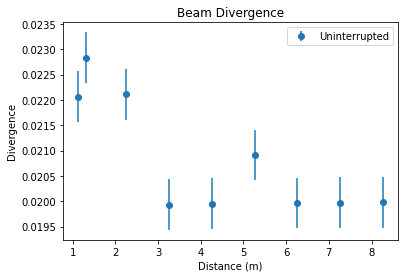

In [55]:
theta  = np.sqrt((beam_diam**2 - d_0**2)/distances**2)
#HERE WE NEED TO CALCULATE THETA UNCERTAINTY USING dtheta = sqrt((df/ddist ^2 + df/ddiam^2)) 
#Just partial differentiation for each variable with uncertainty and add. 

plt.errorbar(distances[1:], theta[1:], label="Uninterrupted",yerr = del_beam_diam, fmt = 'o')
plt.xlabel("Distance (m)")
plt.ylabel("Divergence")
plt.title("Beam Divergence")
plt.legend()

We created a Galilean Beam Expander, using a -25mm focal length lens and a 200mm focal length lens. 


In [56]:
distances2_cm = [176.6,324.92,424.92,524.92,624.92,724.92,824.92,924.92,1024.92] #cm
distances2 = np.array(distances2_cm)*0.01

#25 in between two mirrors, 113.1 cm to first mirror , 53in +13.7cm to end of table
#Beam 2 and 3 were measured at the same distances

beam2_diam_cm = [2.36,1.95,1.80,1.70,1.60,1.50,1.50,1.40,1.35] #cm
del_beam2_diam = 0.0005 #m
beam2_diam = np.array(beam2_diam_cm) * 0.01 #m
print(distances2, beam2_diam)

beam3_diam_cm = [2.40,3.25,3.8,4.4,4.83,5.52,6.13,6.75,7.46] #cm
del_beam3_diam = 0.0005 #m
beam3_diam = np.array(beam3_diam_cm) * 0.01 #m

d_0 = [beam_diam[0],beam2_diam[0],beam3_diam[0]]

[ 1.766   3.2492  4.2492  5.2492  6.2492  7.2492  8.2492  9.2492 10.2492] [0.0236 0.0195 0.018  0.017  0.016  0.015  0.015  0.014  0.0135]


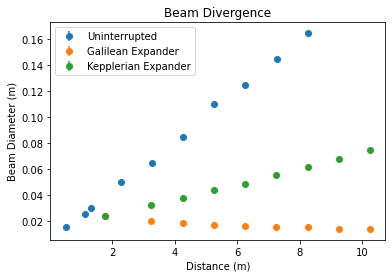

In [57]:
plt.errorbar(distances, beam_diam, label="Uninterrupted",yerr = del_beam_diam, fmt = 'o')
plt.errorbar(distances2, beam2_diam, label = "Galilean Expander", yerr=del_beam2_diam, fmt = 'o')
plt.errorbar(distances2, beam3_diam, label = "Kepplerian Expander", yerr=del_beam3_diam, fmt = 'o')
plt.xlabel("Distance (m)")
plt.ylabel("Beam Diameter (m)")
plt.title("Beam Divergence")
plt.legend()
plt.show()

Now we want to take the divergence of all 3 and compare them

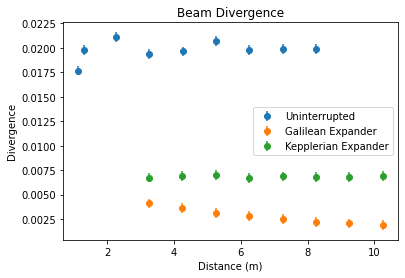

In [58]:

theta  = np.sqrt((beam_diam**2 - d_0[0]**2)/distances**2)
theta2 = np.sqrt(np.abs((beam2_diam**2 - d_0[1]**2)/distances2**2))
theta3 = np.sqrt((beam3_diam**2 - d_0[2]**2)/distances2**2)

#THE CURRENT UNCERTAINTIES FOR THETA NEED TO BE CALCULATED

plt.errorbar(distances[1:], theta[1:], label="Uninterrupted",yerr = del_beam_diam, fmt = 'o')
plt.errorbar(distances2[1:], theta2[1:], label="Galilean Expander",yerr = del_beam_diam, fmt = 'o')
plt.errorbar(distances2[1:], theta3[1:], label="Kepplerian Expander",yerr = del_beam_diam, fmt = 'o')
plt.xlabel("Distance (m)")
plt.ylabel("Divergence")
plt.title("Beam Divergence")
plt.legend()

In [61]:
import PhysicsFunctions as phy

theta_fit = phy.fitLinear(distances[1:],theta[1:])
print("--------------------------------------")
theta2_fit = phy.fitLinear(distances2[1:],theta2[1:])
print("--------------------------------------")
theta3_fit = phy.fitLinear(distances2[1:],theta3[1:])
print("--------------------------------------")


[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 9
    # variables        = 2
    chi-square         = 6.5476e-06
    reduced chi-square = 9.3537e-07
    Akaike info crit   = -123.202735
    Bayesian info crit = -122.808286
    R-squared          = 0.09241131
[[Variables]]
    slope:  1.1175e-04 +/- 1.3237e-04 (118.45%) (init = 1)
    b:      0.01928254 +/- 6.6135e-04 (3.43%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, b) = -0.8731
--------------------------------------
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 7
    # data points      = 8
    # variables        = 2
    chi-square         = 1.5749e-07
    reduced chi-square = 2.6248e-08
    Akaike info crit   = -137.946735
    Bayesian info crit = -137.787852
    R-squared          = 0.96260992
[[Variables]]
    slope: -3.1071e-04 +/- 2.4999e-05 (8.05%) (init = 1)
    b:      0.00487734 +/- 1.7818e-04 (3.65%) (in